In [1]:
%matplotlib inline


# Formatting date ticks using ConciseDateFormatter


Finding good tick values and formatting the ticks for an axis that
has date data is often a challenge.  `~.dates.ConciseDateFormatter` is
meant to improve the strings chosen for the ticklabels, and to minimize
the strings used in those tick labels as much as possible.

<div class="alert alert-info"><h4>Note</h4><p>This formatter is a candidate to become the default date tick formatter
    in future versions of Matplotlib.  Please report any issues or
    suggestions for improvement to the github repository or mailing list.</p></div>


In [2]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

First, the default formatter.



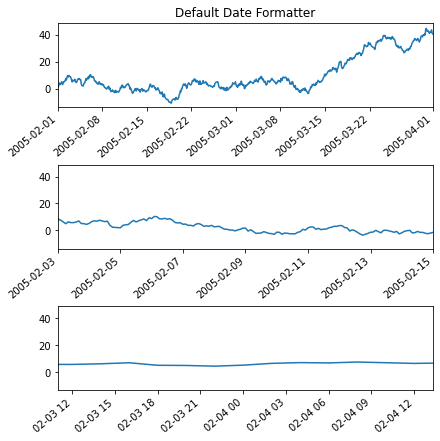

In [3]:
base = datetime.datetime(2005, 2, 1)
dates = [base + datetime.timedelta(hours=(2 * i)) for i in range(732)]
N = len(dates)
np.random.seed(19680801)
y = np.cumsum(np.random.randn(N))

fig, axs = plt.subplots(3, 1, constrained_layout=True, figsize=(6, 6))
lims = [(np.datetime64('2005-02'), np.datetime64('2005-04')),
        (np.datetime64('2005-02-03'), np.datetime64('2005-02-15')),
        (np.datetime64('2005-02-03 11:00'), np.datetime64('2005-02-04 13:20'))]
for nn, ax in enumerate(axs):
    ax.plot(dates, y)
    ax.set_xlim(lims[nn])
    # rotate_labels...
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')
axs[0].set_title('Default Date Formatter')
plt.show()

The default date formatter is quite verbose, so we have the option of
using `~.dates.ConciseDateFormatter`, as shown below.  Note that
for this example the labels do not need to be rotated as they do for the
default formatter because the labels are as small as possible.



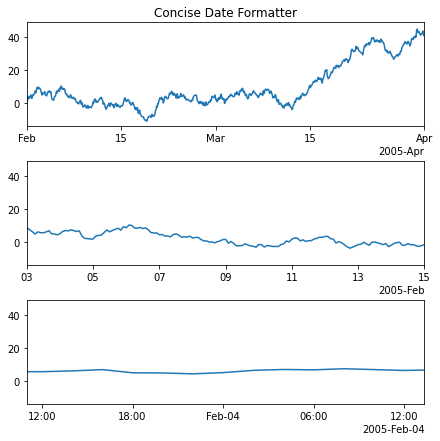

In [4]:
fig, axs = plt.subplots(3, 1, constrained_layout=True, figsize=(6, 6))
for nn, ax in enumerate(axs):
    locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
    formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)

    ax.plot(dates, y)
    ax.set_xlim(lims[nn])
axs[0].set_title('Concise Date Formatter')

plt.show()

If all calls to axes that have dates are to be made using this converter,
it is probably most convenient to use the units registry where you do
imports:



In [ ]:
import matplotlib.units as munits
converter = mdates.ConciseDateConverter()
munits.registry[np.datetime64] = converter
munits.registry[datetime.date] = converter
munits.registry[datetime.datetime] = converter

fig, axs = plt.subplots(3, 1, figsize=(6, 6), constrained_layout=True)
for nn, ax in enumerate(axs):
    ax.plot(dates, y)
    ax.set_xlim(lims[nn])
axs[0].set_title('Concise Date Formatter')

plt.show()

Localization of date formats
============================

Dates formats can be localized if the default formats are not desirable by
manipulating one of three lists of strings.

The ``formatter.formats`` list of formats is for the normal tick labels,
There are six levels: years, months, days, hours, minutes, seconds.
The ``formatter.offset_formats`` is how the "offset" string on the right
of the axis is formatted.  This is usually much more verbose than the tick
labels. Finally, the ``formatter.zero_formats`` are the formats of the
ticks that are "zeros".  These are tick values that are either the first of
the year, month, or day of month, or the zeroth hour, minute, or second.
These are usually the same as the format of
the ticks a level above.  For example if the axis limits mean the ticks are
mostly days, then we label 1 Mar 2005 simply with a "Mar".  If the axis
limits are mostly hours, we label Feb 4 00:00 as simply "Feb-4".

Note that these format lists can also be passed to `.ConciseDateFormatter`
as optional kwargs.

Here we modify the labels to be "day month year", instead of the ISO
"year month day":



In [ ]:
fig, axs = plt.subplots(3, 1, constrained_layout=True, figsize=(6, 6))

for nn, ax in enumerate(axs):
    locator = mdates.AutoDateLocator()
    formatter = mdates.ConciseDateFormatter(locator)
    formatter.formats = ['%y',  # ticks are mostly years
                         '%b',       # ticks are mostly months
                         '%d',       # ticks are mostly days
                         '%H:%M',    # hrs
                         '%H:%M',    # min
                         '%S.%f', ]  # secs
    # these are mostly just the level above...
    formatter.zero_formats = [''] + formatter.formats[:-1]
    # ...except for ticks that are mostly hours, then it is nice to have
    # month-day:
    formatter.zero_formats[3] = '%d-%b'

    formatter.offset_formats = ['',
                                '%Y',
                                '%b %Y',
                                '%d %b %Y',
                                '%d %b %Y',
                                '%d %b %Y %H:%M', ]
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)

    ax.plot(dates, y)
    ax.set_xlim(lims[nn])
axs[0].set_title('Concise Date Formatter')

plt.show()

Registering a converter with localization
=========================================

`.ConciseDateFormatter` doesn't have rcParams entries, but localization
can be accomplished by passing kwargs to `~.ConciseDateConverter` and
registering the datatypes you will use with the units registry:



In [ ]:
import datetime

formats = ['%y',          # ticks are mostly years
           '%b',     # ticks are mostly months
           '%d',     # ticks are mostly days
           '%H:%M',  # hrs
           '%H:%M',  # min
           '%S.%f', ]  # secs
# these can be the same, except offset by one level....
zero_formats = [''] + formats[:-1]
# ...except for ticks that are mostly hours, then its nice to have month-day
zero_formats[3] = '%d-%b'
offset_formats = ['',
                  '%Y',
                  '%b %Y',
                  '%d %b %Y',
                  '%d %b %Y',
                  '%d %b %Y %H:%M', ]

converter = mdates.ConciseDateConverter(
    formats=formats, zero_formats=zero_formats, offset_formats=offset_formats)

munits.registry[np.datetime64] = converter
munits.registry[datetime.date] = converter
munits.registry[datetime.datetime] = converter

fig, axs = plt.subplots(3, 1, constrained_layout=True, figsize=(6, 6))
for nn, ax in enumerate(axs):
    ax.plot(dates, y)
    ax.set_xlim(lims[nn])
axs[0].set_title('Concise Date Formatter registered non-default')

plt.show()